# Assignment Week 3 - "Large" Datasets and Data Augmentation

## Task 1

1. Download the ["Fast Food Classification Dataset - V2"](https://www.kaggle.com/datasets/utkarshsaxenadn/fast-food-classification-dataset/data) from Kaggle.

2. Unzip and ensure that the dataset in Colab is structured as follows:

```
|
|-- Fast Food Classification V2
|   |-- TFRecords
|   |-- Test
|   |-- Train
|   `-- Valid
|-- sample_data
`-- archive.zip
```

`Fast Food Classification V2` and `archive.zip` should be on the same level as the already existing `sample_data` directory from Colab. You can ignore the `TFRecords` subdirectory in the following tasks.

In [1]:
#!/bin/bash
!curl -L -o archive.zip https://www.kaggle.com/api/v1/datasets/download/utkarshsaxenadn/fast-food-classification-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  820M  100  820M    0     0   106M      0  0:00:07  0:00:07 --:--:--  119M


In [2]:
!unzip -q archive.zip

## Task 2

1. Define the directory paths for training, validation, and test datasets.

2. Apply the provided `delete_invalid_images` function to check and remove any corrupted or invalid images in each of the three dataset directories.

In [27]:
TRAINING_DIR = "Fast Food Classification V2/Train"
VALIDATION_DIR = "Fast Food Classification V2/Valid"
TEST_DIR = "Fast Food Classification V2/Test"

In [28]:
import os
from PIL import Image

# Define the paths to the directories
directories = [
    TRAINING_DIR,
    VALIDATION_DIR,
    TEST_DIR
]

# Define supported image file extensions
supported_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp'}

def delete_invalid_images(directory):
    """Goes through a directory and deletes any invalid or unsupported images."""
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            # Check if the file has a supported extension
            if not any(file.lower().endswith(ext) for ext in supported_extensions):
                print(f"Deleting unsupported file: {file_path}")
                os.remove(file_path)
                continue

            try:
                with Image.open(file_path) as img:
                    img.load()  # Ensure the image content can be read
                    if img.format not in ["JPEG", "PNG", "GIF", "BMP"]:
                        raise IOError("Unsupported image format")
            except (IOError, SyntaxError, AttributeError) as e:
                print(f"Deleting invalid or corrupted image: {file_path}")
                os.remove(file_path)

# Run the function for each directory
for dir_path in directories:
    delete_invalid_images(dir_path)

print("Invalid and unsupported image cleanup completed.")

Invalid and unsupported image cleanup completed.


# Task 3

1. Implement a function that visualizes 3 random examples per class from the training data to get a feel for the dataset.

2. Run the function multiple times to get different images from the dataset.

Tip: You can use whatever Python packages you like. `opencv` and `matplotlib` might be suitable choices.

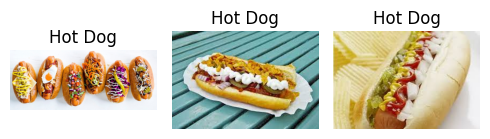

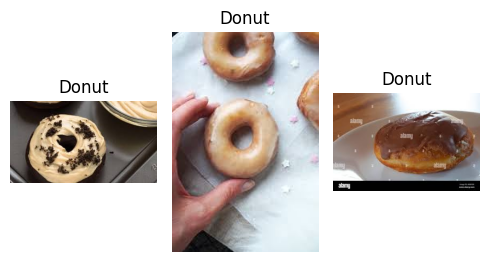

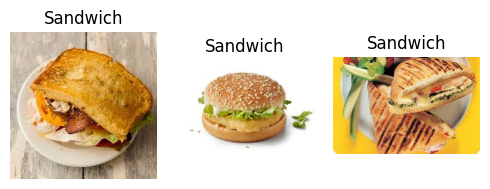

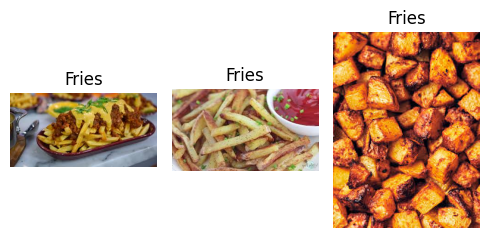

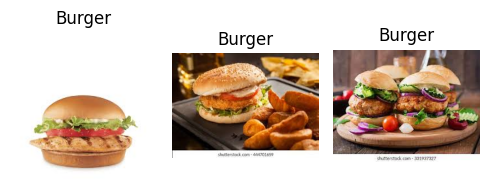

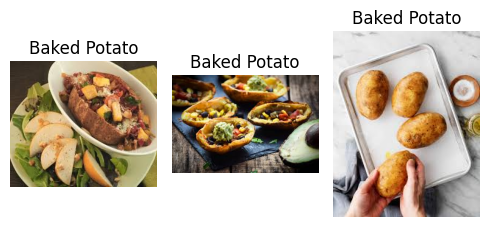

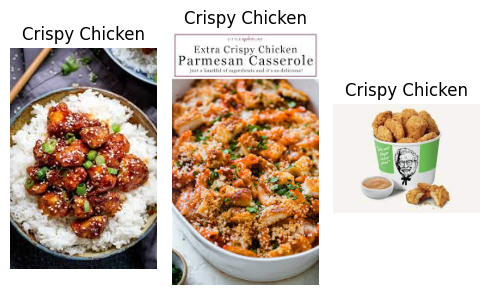

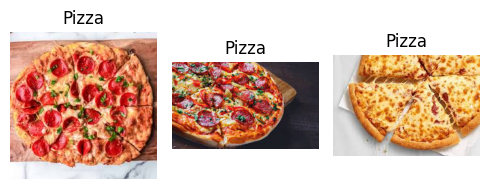

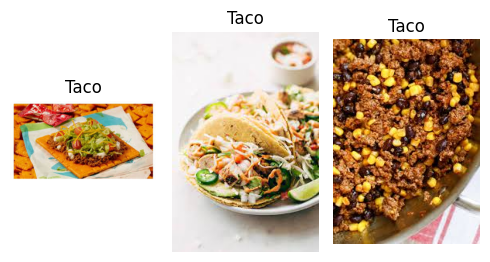

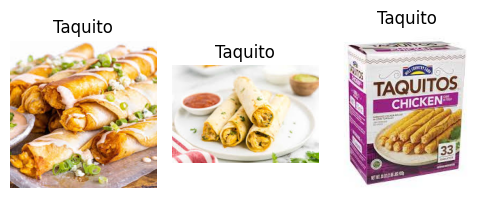

In [29]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def visualize_random_images(directory_path, num_images=3):
    image_files = [image_file for image_file in os.listdir(directory_path)]

    selected_images = random.sample(image_files, num_images)

    # Plot the selected images
    fig, axes = plt.subplots(ncols=len(selected_images), figsize=(5, 5))
    if len(selected_images) == 1:  # Handle case where there's only one image
        axes = [axes]

    for ax, image_file in zip(axes, selected_images):
        image_path = os.path.join(directory_path, image_file)
        image = Image.open(image_path)
        ax.imshow(image)
        ax.axis("off")
        ax.set_title(os.path.basename(directory_path))  # Set class name as title

    plt.tight_layout()
    plt.show()


class_directory_paths = os.listdir(TRAINING_DIR)

for class_directory_path in class_directory_paths:
  visualize_random_images(TRAINING_DIR + "/" + class_directory_path)

# Task 4

1. Choose an appropriate image size for the input images for an image classification task and set the values of the predefined constants `IMAGE_HEIGHT` and `IMAGE_WIDTH`.

2. Load the training, validation and test datasets using the `image_dataset_from_directory` function shown in the Coursera course. Specifically, set appropriate values for `label_mode`, `batch_size`, `image_size` and `shuffle`. Each dataset should get a fixed `seed` of `123`.
Checkout the documentation for details:
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

3. Briefly explain for which of the training, validation and test datasets might be important to shuffle the data and why this is important.

In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [31]:
BATCH_SIZE = 64
IMAGE_HEIGHT = 150 # TODO: Choose an appropriate image height
IMAGE_WIDTH = 150 # TODO: Choose an appropriate image width

In [35]:
train_images = tf.keras.utils.image_dataset_from_directory(
    TRAINING_DIR,
    seed=123,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE)

validation_images = tf.keras.utils.image_dataset_from_directory(
    VALIDATION_DIR,
    seed=123,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE)

test_images = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    seed=123,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE)

# Optimize the datasets for training
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_images = (train_images
                .cache()
                .shuffle(SHUFFLE_BUFFER_SIZE)
                .prefetch(PREFETCH_BUFFER_SIZE))

validation_images = (validation_images
                     .cache()
                     .prefetch(PREFETCH_BUFFER_SIZE))

test_images = (test_images
               .cache()
               .prefetch(PREFETCH_BUFFER_SIZE))


Found 14999 files belonging to 10 classes.
Found 3500 files belonging to 10 classes.
Found 1500 files belonging to 10 classes.


**Expected output:**  
Found 14999 images belonging to 10 classes.  
Found 3500 images belonging to 10 classes.  
Found 1500 images belonging to 10 classes.  

# Task 5

In this exercise you will be given a predefined model architecture (except for the data augmentation layers) that you should train using the data with and without the application of data augmentation and compare the results of the different models.

1. Train the model without data augmentation for at least 30 epochs. Save a screenshot of the resulting accuracy and loss plots and judge the quality of the model. Also note the loss and accuracy of the model on the test set.

2. Train the model again, this time using data augmentation for the same number of epochs as the previous model. Choose 2 to 3 data augmentation techniques (other than rescaling) that might be suitable for the given dataset, and briefly explain why. Compare the training and model quality of the two models.

Take a look at this tutorial for an overview of (some) data augmentation techniques:
https://www.tensorflow.org/tutorials/images/data_augmentation

In [42]:
# TODO: Add data augmentation layers
data_augmentation_layers = tf.keras.Sequential([
    tf.keras.Input(shape=(150,150,3)),
    # Add the augmentation layers
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2, fill_mode='nearest'),
    tf.keras.layers.RandomTranslation(0.2,0.2, fill_mode='nearest'),
    tf.keras.layers.RandomZoom(0.2, fill_mode='nearest')
])

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Input((IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    tf.keras.layers.Rescaling(1/255),
    data_augmentation_layers,
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [48]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)              │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,970,912 (121.96 MB)

 Trainable params: 10,656,970 (40.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,313,942 (81.31 MB)

In [49]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images,
                    validation_data=validation_images,
                    epochs=30)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.5146 - loss: 1.4532 - val_accuracy: 0.5051 - val_loss: 1.5682
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.5033 - loss: 1.4577 - val_accuracy: 0.5106 - val_loss: 1.5006
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.5157 - loss: 1.4260 - val_accuracy: 0.5203 - val_loss: 1.4820
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.5193 - loss: 1.4335 - val_accuracy: 0.5311 - val_loss: 1.4726
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.5263 - loss: 1.4264 - val_accuracy: 0.5237 - val_loss: 1.5068
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.5249 - loss: 1.4091 - val_accuracy: 0.5100 - val_loss: 1.5450
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.5250 - loss: 1.4159 - val_accuracy: 0.5337 - val_loss: 1.4598
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.5302 - loss: 1.4038 - val_accurac

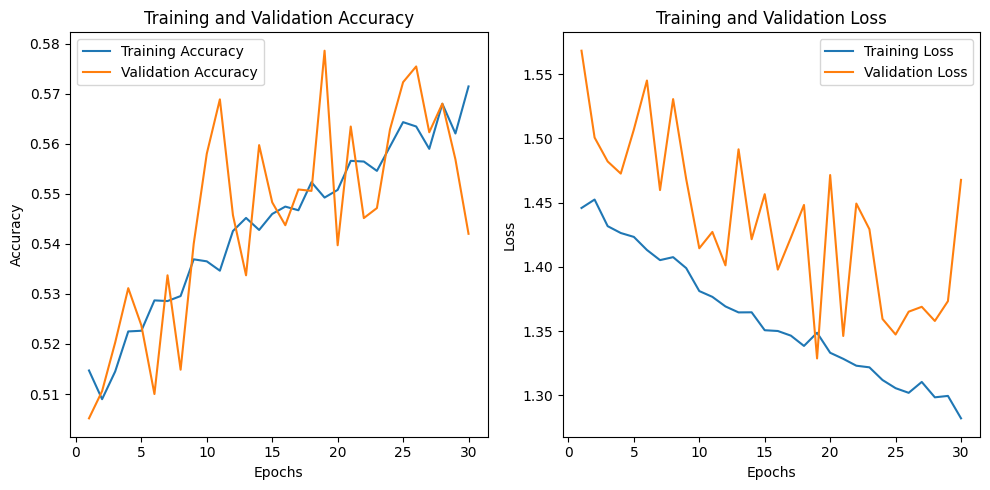

In [50]:
import matplotlib.pyplot as plt

# Plot the model training history
def plot_training_history(history):
    # Extracting accuracy and loss from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Setting up the number of epochs for the x-axis
    epochs_range = range(1, len(acc) + 1)

    # Plotting training and validation accuracy
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plotting training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [51]:
# Calculate loss and accuracy on the test set
test_loss, test_acc = model.evaluate(test_images)
print(f"Test Accuracy: {test_acc} | Test Loss: {test_loss}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5006 - loss: 1.5712
Test Accuracy: 0.5019999742507935 | Test Loss: 1.5698025226593018
